Estimate the probability of a finding a rupture that hosts a displacement larger than a threshold $S_0$ at a given distance away from the principal fault trace for an event of a given magnitude $M_w$. The model follows the formulation below, derived in Rodriguez Padilla and Oskin (202X): 

\begin{equation}
   P(S>S_{0}|x,M_{w}) = \nu_{o} (\frac{x+x_f}{x_f})^{-\gamma} e^{\frac{-S_{0}}{\beta}(\frac{x+x_S}{x_S})^{n}} 
   \end{equation}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# input values for Mw and S0
promptMw = 'Input your desired value for moment magnitude Mw'
promptS0 = 'Input your desirved value for the displacement threshold S0 in meters'

Mw= input(promptMw) # moment magnitude
Mw = float(Mw)
S0 = input(promptS0) # displacement threshold in meters
S0 = float(S0)

In [9]:
# parameters for general model, see Rodriguez Padilla and Oskin (202X) for derivation and fitting
mean_n = 0.41 # scaling exponent for decay of displacement with fault-perpendicular distance
a = 6.8701
b = 0.9629
vo = 0.13
g = 1.19
xfr = 6.7

In [10]:
def PFDHAmodel(So,Mw,n,vo,x_fr,g,a,bi):
    b = 10**(Mw*bi-a) 
    x = np.logspace(1,np.log10(10000),1000)
    PDmodel = np.exp((-So/b)*(x+1)**n)
    lambdamodel = vo * ((x+x_fr)/x_fr)**-g 
    PS_So= lambdamodel*PDmodel
    return PS_So

In [11]:
def standard_error(PS_So,cinfo,alpha):
    x = np.logspace(1,np.log10(10000),1000)
    a16 =  -0.10016689
    a84 =  0.05619148
    err16 = a16*np.exp(x**0.15)
    err84 = a84*np.exp(x**0.15)
    PS_So_84 = np.exp((err16 + np.log(PS_So))) 
    PS_So_16 = np.exp((err84 + np.log(PS_So))) 
    plt.plot(x,PS_So,c=cinfo,alpha=1,label='Preferred model')
    plt.fill_between(x,PS_So_84,PS_So_16,color=cinfo,alpha=alpha,label='1$\sigma$ confidence interval')

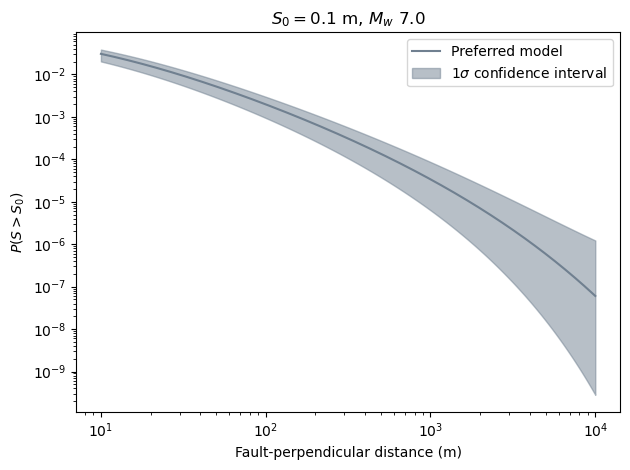

In [12]:
plt.figure()

P_S_So= PFDHAmodel(S0,Mw,mean_n,vo,xfr,g,a,b)

standard_error(P_S_So,'slategrey',0.5)

plt.xscale('log')
plt.yscale('log')
plt.ylabel('$P(S>S_{0}$)')
plt.title('$S_0 = %s$ m,' %S0 + ' $M_w$ %s' %Mw)
plt.xlabel('Fault-perpendicular distance (m)')
plt.legend()
plt.tight_layout()
plt.savefig('PS_So_model.pdf')
plt.show()
